In [1]:
# کتابخانه‌ها را وارد می‌کنیم / Wir importieren die Bibliotheken
import pandas as pd

# خواندن فایل CSV / Einlesen der CSV-Datei
data = pd.read_csv("C:/Users/smahm/Desktop/Certified Data Analyst/تکلیف/Capstone Projekt/WineQT.csv")

# نمایش ۵ ردیف اول / Anzeige der ersten 5 Zeilen
print(data.head())

# اطلاعات کلی دیتافریم / Allgemeine Informationen zum DataFrame
print(data.info())

# خلاصه آماری / Statistische Zusammenfassung
print(data.describe())
# بررسی مقادیر گمشده / Überprüfung auf fehlende Werte
print(data.isnull().sum())

# حذف مقادیر پرت شدید برای ویژگی‌های مهم (مثلاً الکل) / Entfernen extremer Ausreißer
data = data[(data['alcohol'] > 5) & (data['alcohol'] < 15)]


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9

In [3]:
# بررسی مقادیر گمشده / Überprüfung auf fehlende Werte
print(data.isnull().sum())

# حذف مقادیر پرت شدید برای ویژگی‌های مهم (مثلاً الکل) / Entfernen extremer Ausreißer
data = data[(data['alcohol'] > 5) & (data['alcohol'] < 15)]


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64


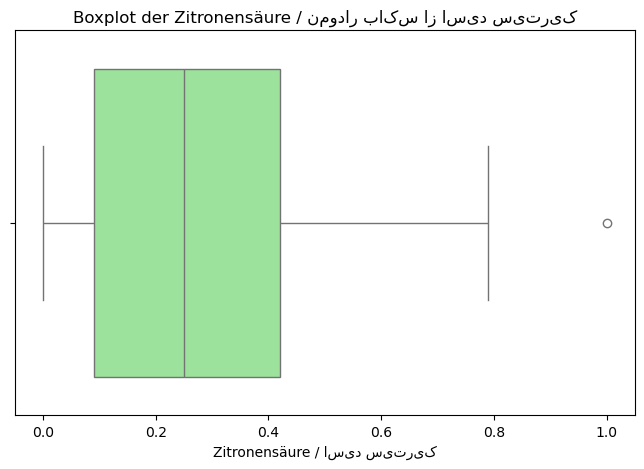

In [25]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=data['citric acid'], color='lightgreen')
plt.title('Boxplot der Zitronensäure / نمودار باکس از اسید سیتریک')
plt.xlabel('Zitronensäure / اسید سیتریک')
plt.show()


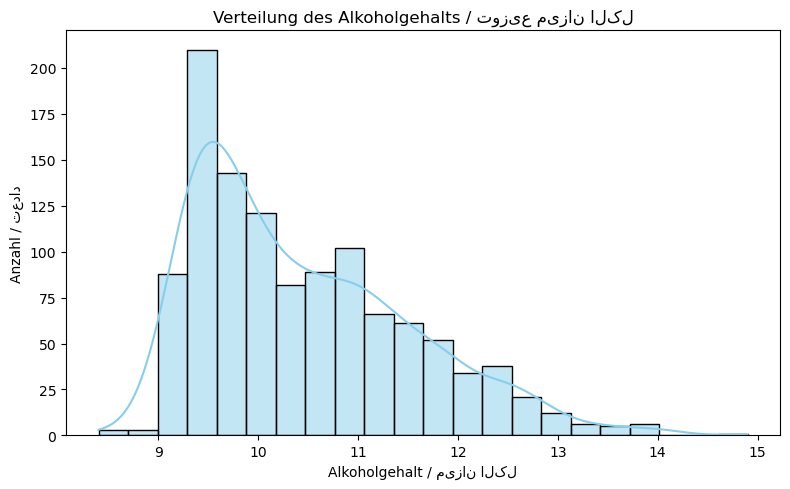

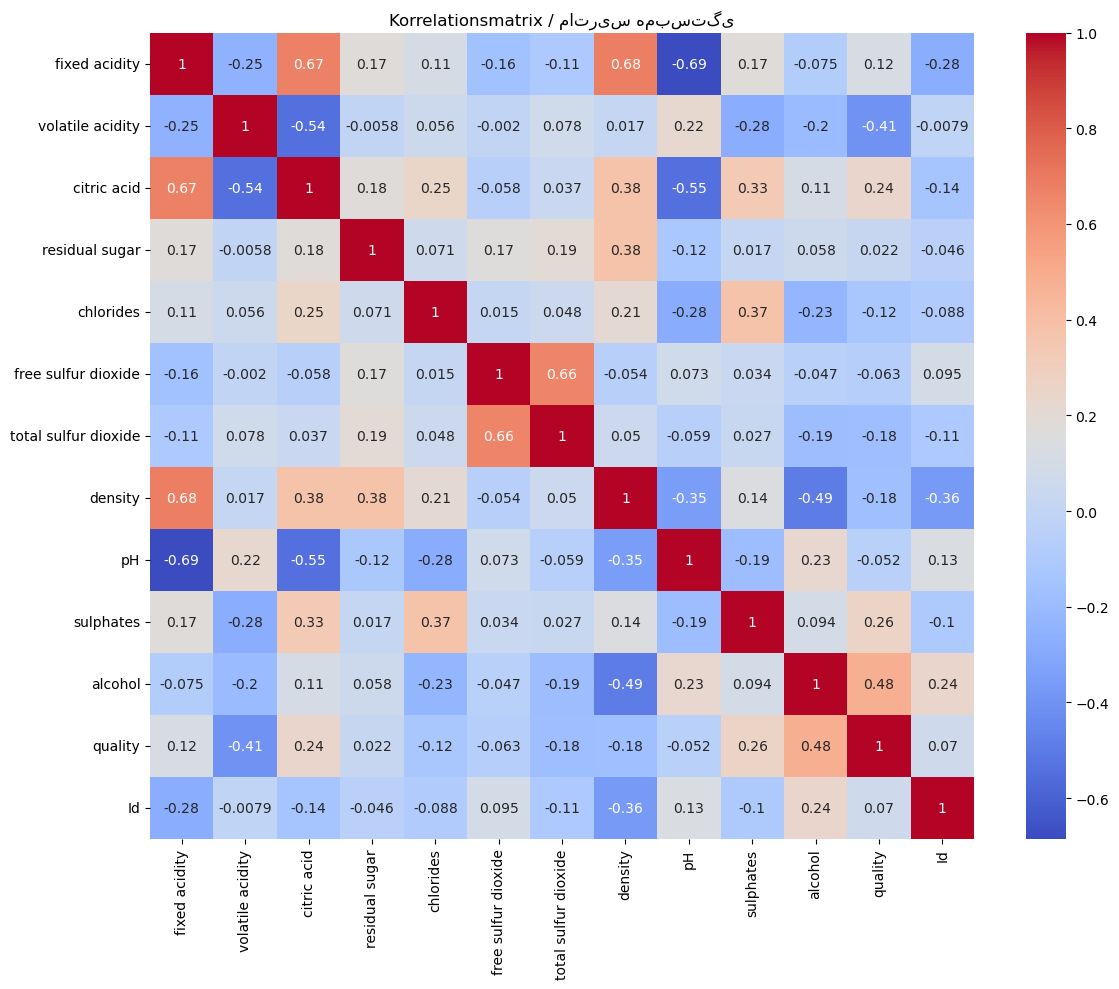

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# هیستوگرام الکل / Histogramm: Alkoholgehalt
plt.figure(figsize=(8, 5))
sns.histplot(data['alcohol'], kde=True, color='skyblue')
plt.title('Verteilung des Alkoholgehalts / توزیع میزان الکل')
plt.xlabel('Alkoholgehalt / میزان الکل')
plt.ylabel('Anzahl / تعداد')
plt.tight_layout()
plt.show()

# ماتریس همبستگی / Korrelationsmatrix
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Korrelationsmatrix / ماتریس همبستگی')
plt.tight_layout()
plt.show()


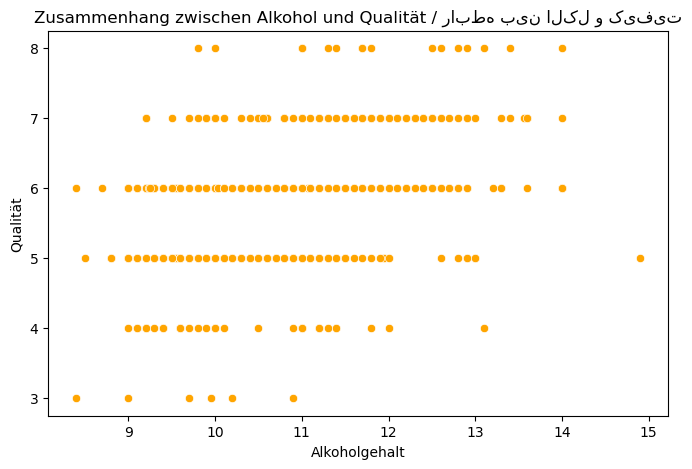

In [35]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='alcohol', y='quality', data=data, color='orange')
plt.title('Zusammenhang zwischen Alkohol und Qualität / رابطه بین الکل و کیفیت')
plt.xlabel('Alkoholgehalt')
plt.ylabel('Qualität')
plt.show()


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# ویژگی‌ها و هدف / Merkmale und Ziel
X = data.drop('quality', axis=1)
y = data['quality']

# تقسیم داده‌ها به آموزش و تست / Aufteilung in Trainings- und Testdaten
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# نرمال‌سازی داده‌ها / Standardisierung der Daten
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# مدل رگرسیون خطی / Lineare Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# مدل جنگل تصادفی / Random Forest
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# مدل XGBoost / XGBoost Modell
xgb = XGBRegressor(random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

# مقایسه نتایج / Vergleich der Ergebnisse
print("Linear Regression:")
print("MSE:", mean_squared_error(y_test, y_pred_lr))
print("R²:", r2_score(y_test, y_pred_lr))

print("Random Forest:")
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("R²:", r2_score(y_test, y_pred_rf))

print("XGBoost:")
print("MSE:", mean_squared_error(y_test, y_pred_xgb))
print("R²:", r2_score(y_test, y_pred_xgb))


Linear Regression:
MSE: 0.382428352129197
R²: 0.3127638539508186
Random Forest:
MSE: 0.29701834061135374
R²: 0.46624841340552425
XGBoost:
MSE: 0.3362394869327545
R²: 0.3957667946815491


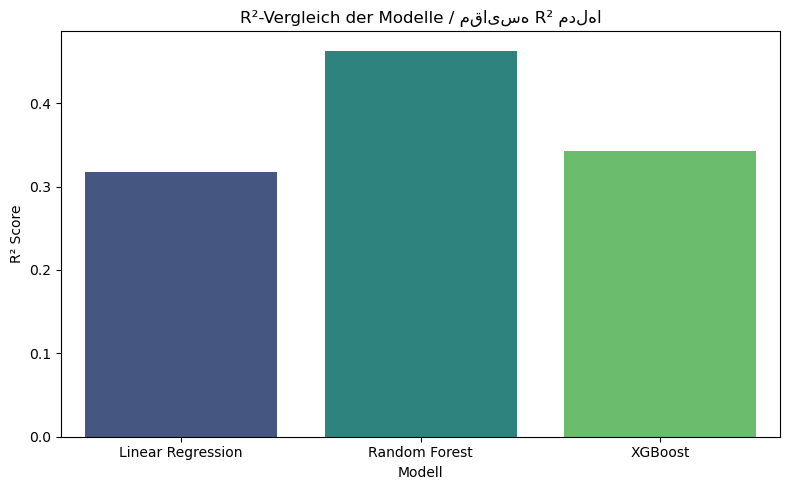

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ایجاد یک DataFrame برای مدل‌ها و نمرات آن‌ها / Erstellung eines DataFrames für Modelle und ihre Scores
df_scores = pd.DataFrame({
    'Modell': models,
    'R2_Score': r2_scores
})

# رسم نمودار با hue مساوی با نام مدل‌ها (برای تطبیق رنگ‌ها) / Verwendung von 'hue' zur Farbsteuerung
plt.figure(figsize=(8, 5))
sns.barplot(data=df_scores, x='Modell', y='R2_Score', hue='Modell', palette='viridis', dodge=False, legend=False)
plt.title('R²-Vergleich der Modelle / مقایسه R² مدل‌ها')
plt.ylabel('R² Score')
plt.xlabel('Modell')
plt.tight_layout()
plt.show()
